In [1]:
import pandas as pd
import os
import seaborn as sns
import env
import wrangle_reg as acq
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Acquire

In [2]:
df = acq.get_zillow_data()

csv file found and loaded


In [3]:
df.head()

,bathroomcnt,bedroomcnt,fips,garagecarcnt,yearbuilt,lotsizesquarefeet,taxvaluedollarcnt,transactiondate
0,3.5,4.0,6059.0,2.0,1998.0,4506.0,1023282.0,2017-01-01
1,1.0,2.0,6111.0,1.0,1967.0,12647.0,464000.0,2017-01-01
2,2.0,3.0,6059.0,2.0,1962.0,8432.0,564778.0,2017-01-01
3,3.0,4.0,6037.0,NaN,1970.0,13038.0,145143.0,2017-01-01
4,3.0,4.0,6037.0,NaN,1950.0,63000.0,773303.0,2017-01-01


In [4]:
df.describe()

,bathroomcnt,bedroomcnt,fips,garagecarcnt,yearbuilt,lotsizesquarefeet,taxvaluedollarcnt
count,52442.000000,52442.000000,52442.000000,18015.000000,52326.000000,5.207300e+04,5.244100e+04
mean,2.299397,3.300675,6049.131917,1.948987,1963.393820,1.133952e+04,5.296830e+05
std,1.022764,0.949086,21.028933,0.549944,23.133355,8.674680e+04,7.518883e+05
min,0.000000,0.000000,6037.000000,0.000000,1878.000000,2.360000e+02,1.000000e+03
25%,2.000000,3.000000,6037.000000,2.000000,1950.000000,5.583000e+03,1.937500e+05
50%,2.000000,3.000000,6037.000000,2.000000,1961.000000,6.840000e+03,3.736120e+05
75%,3.000000,4.000000,6059.000000,2.000000,1979.000000,8.798000e+03,6.193010e+05
max,18.000000,14.000000,6111.000000,14.000000,2016.000000,6.971010e+06,4.906124e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroomcnt        52442 non-null  float64
 1   bedroomcnt         52442 non-null  float64
 2   fips               52442 non-null  float64
 3   garagecarcnt       18015 non-null  float64
 4   yearbuilt          52326 non-null  float64
 5   lotsizesquarefeet  52073 non-null  float64
 6   taxvaluedollarcnt  52441 non-null  float64
 7   transactiondate    52442 non-null  object 
dtypes: float64(7), object(1)
memory usage: 3.6+ MB


### Prepare

In [6]:
df = acq.prep_zillow(df)

In [7]:
df.head()

,bathrooms,bedrooms,county,car garage,yr built,sq ft,value,date
0,3.5,4.0,Orange County,2.0,1998.0,4506.0,1023282.0,2017-01-01
1,1.0,2.0,Ventura,1.0,1967.0,12647.0,464000.0,2017-01-01
2,2.0,3.0,Orange County,2.0,1962.0,8432.0,564778.0,2017-01-01
8,2.5,3.0,Orange County,2.0,1980.0,1199.0,319668.0,2017-01-02
9,2.5,3.0,Ventura,2.0,2004.0,3445.0,198054.0,2017-01-02


In [8]:
def drop_columns(df, columns_to_drop):
    df = df.drop(columns=columns_to_drop)
    return df

columns_to_drop = ['yr built', 'date', 'car garage', 'date', 'county']


df = drop_columns(df, columns_to_drop)

In [9]:
df.head()

,bathrooms,bedrooms,sq ft,value
0,3.5,4.0,4506.0,1023282.0
1,1.0,2.0,12647.0,464000.0
2,2.0,3.0,8432.0,564778.0
8,2.5,3.0,1199.0,319668.0
9,2.5,3.0,3445.0,198054.0


In [10]:
df = acq.remove_outliers(df, threshold=3)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


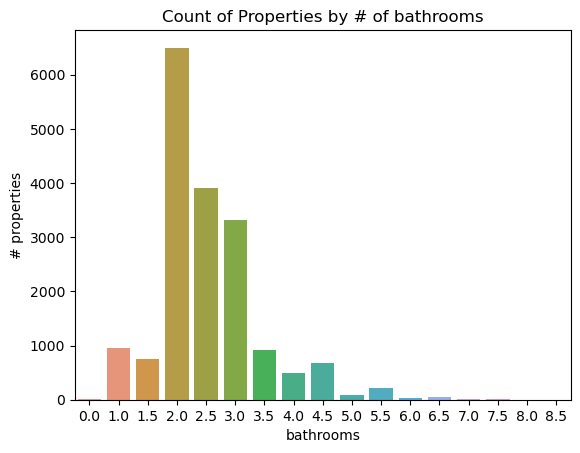

In [11]:
sns.countplot(data=df, x=df.bathrooms)
plt.xlabel('bathrooms')
plt.ylabel('# properties')
plt.title('Count of Properties by # of bathrooms')
plt.show()

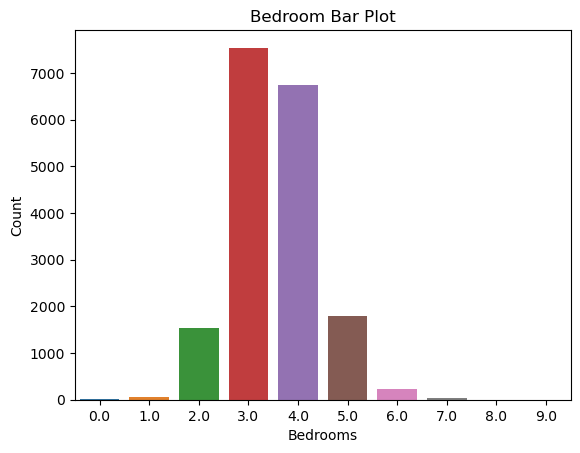

In [12]:
sns.countplot(data=df, x='bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Bedroom Bar Plot')
plt.show()

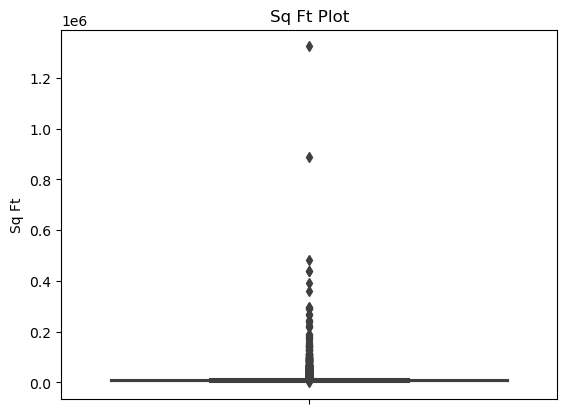

In [13]:
sns.boxplot(data=df, y='sq ft')
plt.ylabel('Sq Ft')
plt.title('Sq Ft Plot')
plt.show()

### Explore

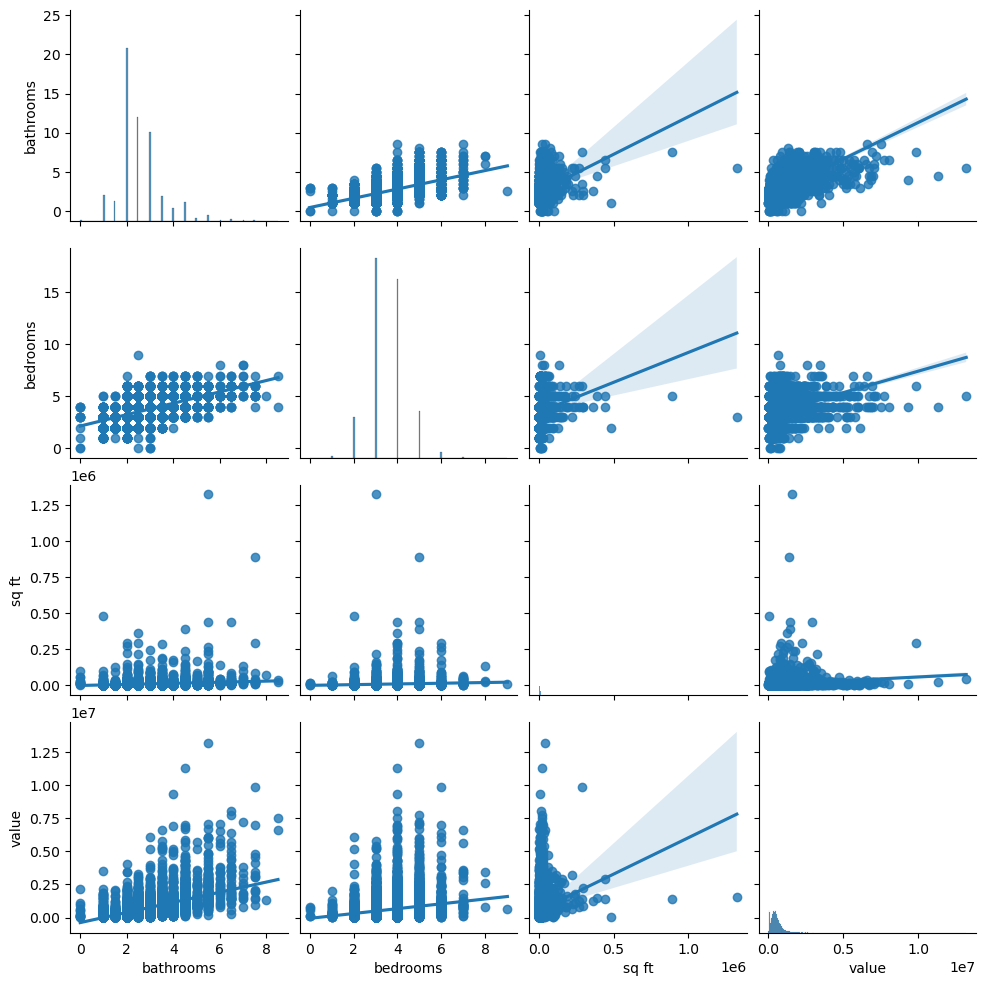

In [14]:
sns.pairplot(df, kind='reg')

In [15]:
train, validate, test = acq.train_split_data(df)


    train -> (10052, 4)
    validate -> (4308, 4)
    test -> (3590, 4)


In [16]:
train.isnull().sum()

bathrooms    0
bedrooms     0
sq ft        0
value        0
dtype: int64

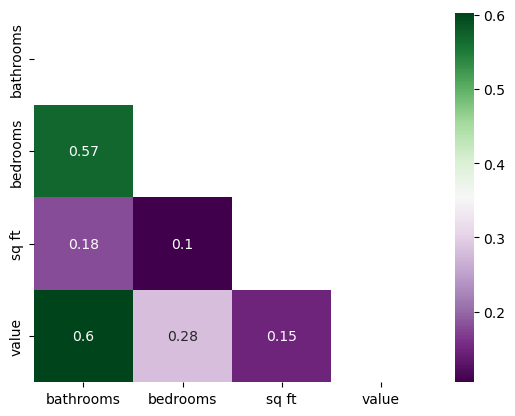

In [17]:
sns.heatmap(train.corr(), cmap='PRGn', annot=True,
           mask=np.triu(train.corr()))
plt.show()

In [ ]:
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X_all, Y)